# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["cod"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | wodonga
Processing Record 3 of Set 1 | malinao ilaya
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | pyin oo lwin
Processing Record 6 of Set 1 | merizo village
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | arish
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | dolores
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | inari
Processing Record 21 of Set 1 | puerto san jose
Processing Record 22 of S

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,48.81,86,92,4.00,NZ,200
1,wodonga,-36.1167,146.8833,48.11,100,0,3.83,AU,200
2,malinao ilaya,14.0000,121.8333,82.51,81,99,8.61,PH,200
3,qaqortoq,60.7167,-46.0333,44.01,84,95,3.76,GL,200
4,pyin oo lwin,22.0333,96.4667,68.68,91,74,1.34,MM,200


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,48.81,86,92,4.00,NZ,200
1,wodonga,-36.1167,146.8833,48.11,100,0,3.83,AU,200
2,malinao ilaya,14.0000,121.8333,82.51,81,99,8.61,PH,200
3,qaqortoq,60.7167,-46.0333,44.01,84,95,3.76,GL,200
4,pyin oo lwin,22.0333,96.4667,68.68,91,74,1.34,MM,200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

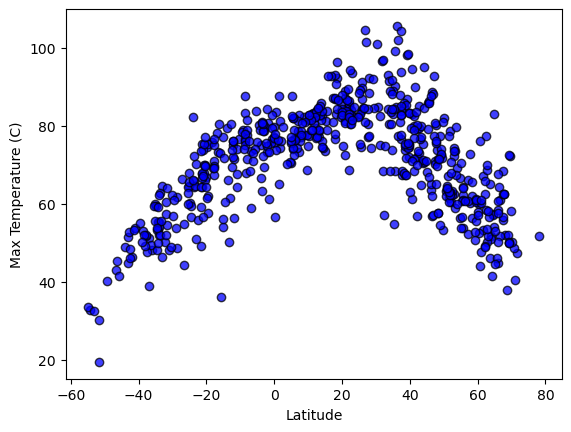

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

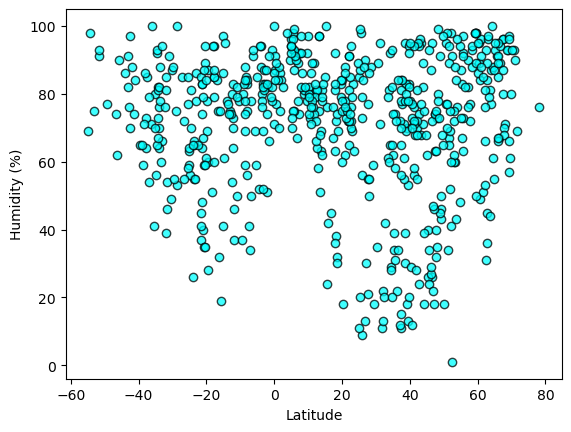

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="cyan", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

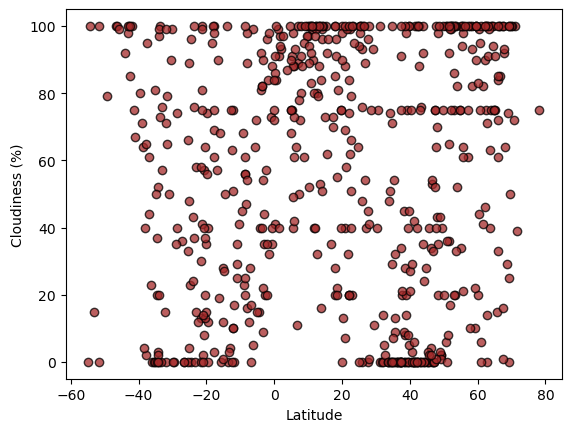

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="brown", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

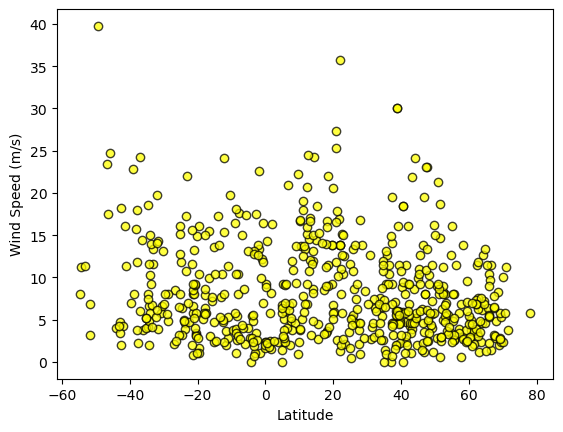

In [48]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def linear_plot(x,y,xcord,ycord):
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    model = st.linregress(x,y)
    y_values = x*model[0]+model[1]
    eq = f"y = {round(model[0],2)}x + {round(model[1],2)}"
    plt.plot(x, y_values, color='red')
    plt.annotate(eq, xy= (xcord,ycord),color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    print(f"R value is {model[2]**2}")
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,malinao ilaya,14.0000,121.8333,82.51,81,99,8.61,PH,200
3,qaqortoq,60.7167,-46.0333,44.01,84,95,3.76,GL,200
4,pyin oo lwin,22.0333,96.4667,68.68,91,74,1.34,MM,200
5,merizo village,13.2658,144.6691,78.58,97,100,17.02,GU,200
7,st. john's,47.5649,-52.7093,70.99,74,75,23.02,CA,200


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,48.81,86,92,4.00,NZ,200
1,wodonga,-36.1167,146.8833,48.11,100,0,3.83,AU,200
6,edinburgh of the seven seas,-37.0676,-12.3116,51.35,54,61,24.20,SH,200
8,port-aux-francais,-49.3500,70.2167,40.28,77,79,39.77,TF,200
11,port mathurin,-19.6833,63.4167,74.70,78,74,16.08,MU,200


###  Temperature vs. Latitude Linear Regression Plot

R value is 0.39453711474646336


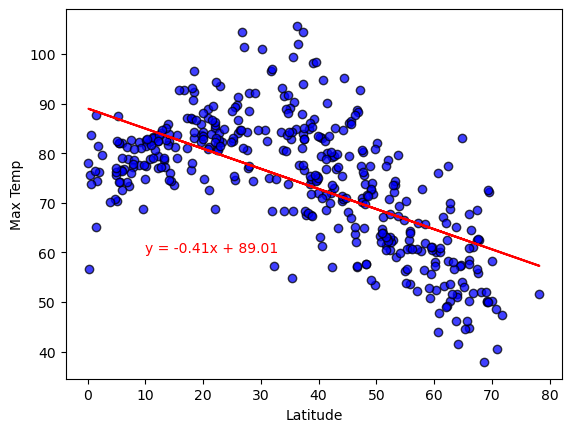

In [30]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linear_plot(x,y,10,60)

# How to get R Value

R value is 0.692214664075064


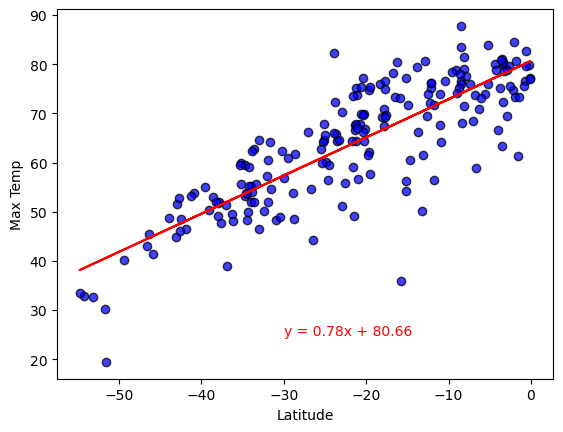

In [32]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
linear_plot(x,y,-30,25)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R value is 0.0010247076538177223


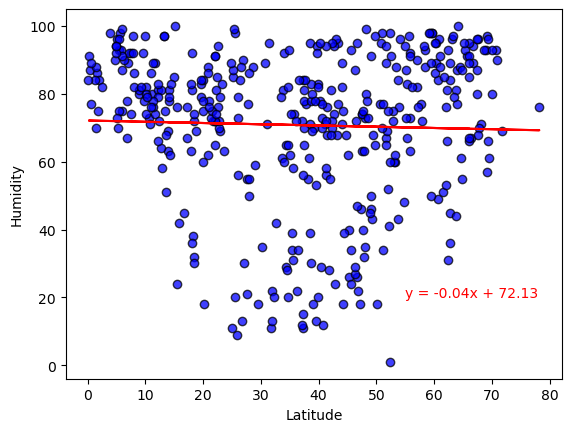

In [54]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
linear_plot(x,y,55,20)

R value is 0.0008861900426481793


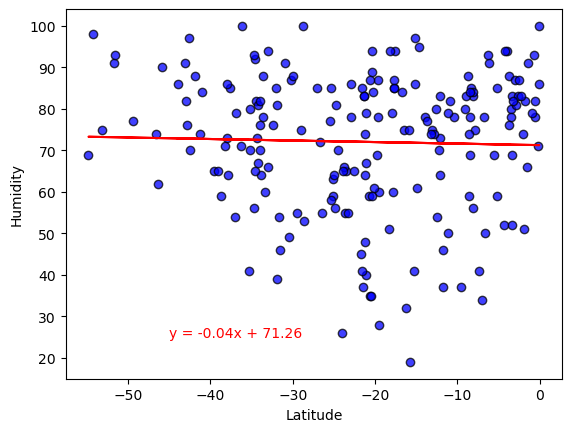

In [35]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
linear_plot(x,y,-45,25)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R value is 0.013754589678460891


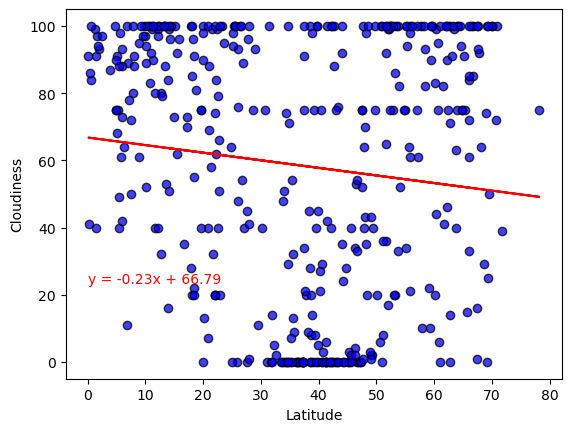

In [58]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
linear_plot(x,y,0,23.5)

R value is 0.005982260546473005


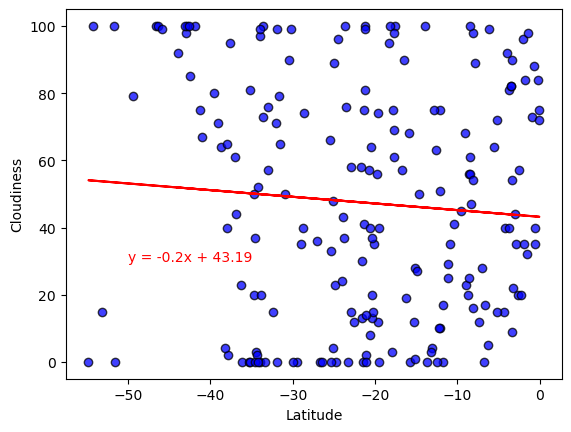

In [37]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
linear_plot(x,y,-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R value is 0.042134526200975055


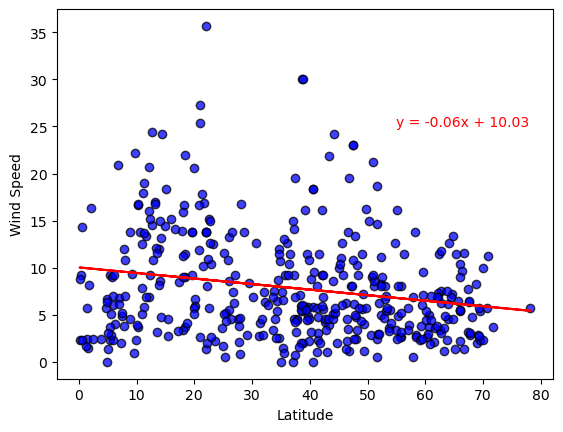

In [60]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
linear_plot(x,y,55,25)

R value is 0.03330775732406964


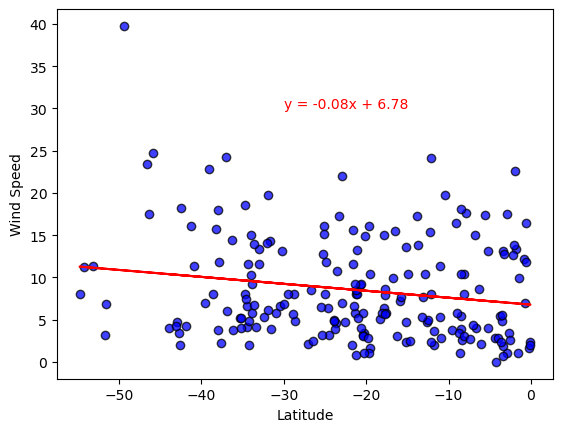

In [41]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
linear_plot(x,y,-30,30)

**Discussion about the linear relationship:** We can use both R-values and the slope of our equations to determine the strength of a relationship. The closer these values are to 0, the weaker the relationship. The closer to 1 or -1, the stronger the relationship. Using this criteria, we can determine that "Humidity", "Cloudiness", and "Wind Speed" do not have a strong enough relationship to draw a solid conclusion. However, Max Temp shows a very strong relationship, especially in the south, with strong slope and R-values. This data helps us prove that the closer a city is to the equator, the hotter it will be. 